In [34]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if bool(re.search('DEFINITIVO', modelo))]

In [36]:
modelos

['DEFINITIVO_1_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_2_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_2_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_3_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_3_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_4_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_mask_05_Xception_

# COMPLETOS

## TEST

In [97]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation_completo.csv'
df_test = pd.read_csv(path)

In [98]:
ix = [i for i in df_test.index if bool(re.search('validation', df_test.nombre.iloc[i]))]
df_test = df_test.iloc[ix]

In [99]:
df_test.nombre

29    DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-00...
30    DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-...
Name: nombre, dtype: object

In [100]:
df_test.sort_values('auc')

,nombre,loss,binary_accuracy,precision,auc
30,DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-...,2.572429,0.830518,0.746025,0.842653
29,DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-00...,1.139059,0.869103,0.804125,0.901440


In [101]:
modelos_evaluados = [model[:-4] for model in df_test.nombre]

In [102]:
evaluados_de_mas = list(set(modelos_evaluados)-set(modelos))
ix = [i for i in df_test.index if df_test.nombre[i][:-4] in evaluados_de_mas]
evaluados_de_mas

['DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-0001_auc-99_valida',
 'DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-0001_auc-99_valida']

In [103]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

['DEFINITIVO_3_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_4_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_2_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_3_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_3_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_4_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_mask_05_Xceptio

In [104]:
# df_test = df_test.drop(ix)
# df_test.to_csv(path, index = False)

## PREDICTION

In [116]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics_completo.csv'
df = pd.read_csv(path)

In [117]:
ix = [i for i in df.index if bool(re.search('validation', df.name.iloc[i]))]
df = df.iloc[ix]

In [118]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [119]:
df.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'auc_mean', 'f1_score_mean'],
      dtype='object')

In [120]:
df.sort_values('name')

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,f1_score_mean
29,DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-00...,0.973895,0.971330,0.971330,0,0.899713,2.865476e-02,1.656092e-02,0,0.906269,...,0.871319,0.869179,0.876237,0.876237,0.859977,0.893798,0.883034,0.883034,0.926626,0.860706
30,DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-...,0.946958,0.999999,0.999996,0,0.864387,3.376220e-07,2.272205e-08,0,0.901614,...,0.822720,0.841191,0.811966,0.811966,0.726398,0.750061,0.708863,0.708863,0.904320,0.819674


In [121]:
evaluados_de_mas = list(set(list(df.name))-set(modelos))
ix = [i for i in df.index if df.name[i] in evaluados_de_mas]
evaluados_de_mas

['DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-0001_auc-99_validation',
 'DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-0001_auc-99_validation']

In [122]:
evaluados_de_menos = list(set(modelos)-set(list(df.name)))
evaluados_de_menos

['DEFINITIVO_3_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_4_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_2_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_3_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_3_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_4_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_1_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_7_mask_Xception_fine-04_batch-8_lr-0001_auc-99',
 'DEFINITIVO_6_mask_05_Xception_fine-05_batch-8_lr-0001_auc-99',
 'DEFINITIVO_5_mask_05_Xceptio

In [123]:
# df = df.drop(ix)
# df.to_csv(path, index = False)

## Cada modelo

In [135]:
import os
import cv2
import json

In [136]:
model_name = 'DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-0001_auc-99_validation'

In [137]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [138]:
os.listdir(p)

['metricas.json',
 'pred_rec_plot_0.png',
 'auc_plot_0.png',
 'pr_re_th_plot_0.png',
 'pred_rec_plot_1.png',
 'auc_plot_1.png',
 'pr_re_th_plot_1.png',
 'pred_rec_plot_2.png',
 'auc_plot_2.png',
 'pr_re_th_plot_2.png',
 'class_report.csv']

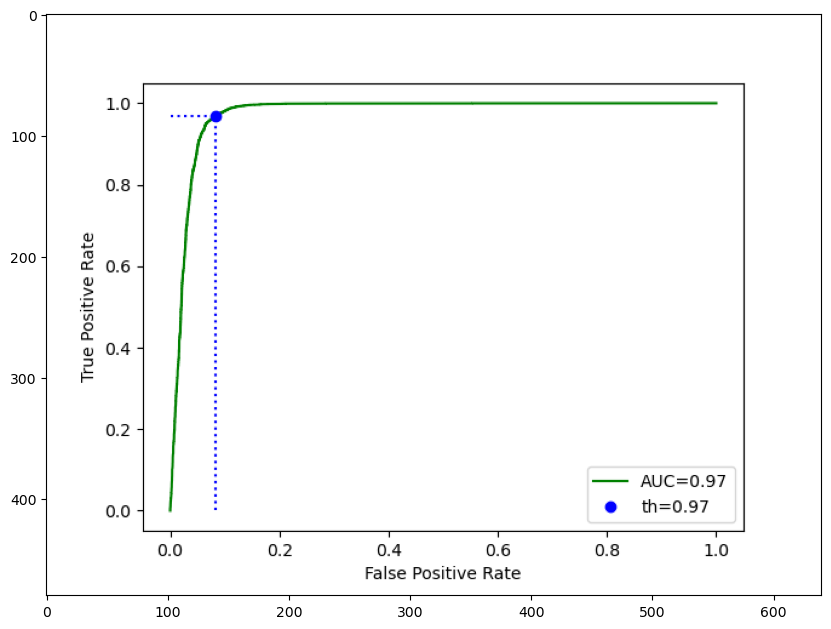

In [141]:
img = cv2.imread(os.path.join(p, 'auc_plot_0.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [140]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

JSONDecodeError: Expecting value: line 1 column 44 (char 43)

In [40]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.946685,0.982791,0.964400,2150.0
1,moderado,0.971191,0.928571,0.949403,2142.0
2,severo,0.980823,0.986359,0.983583,2126.0
3,micro avg,0.965877,0.965877,0.965877,6418.0
4,macro avg,0.966233,0.965907,0.965796,6418.0
5,weighted avg,0.966172,0.965877,0.965749,6418.0
6,samples avg,0.965877,0.965877,0.965877,6418.0
